indices de las anomalias
[ 15  22  35  36  41  43  59  60 106 108 109 114 117 125 131]
datos clasificados como anomalias
       0    1    2    3                4
15   5.7  4.4  1.5  0.4      Iris-setosa
22   4.6  3.6  1.0  0.2      Iris-setosa
35   5.0  3.2  1.2  0.2      Iris-setosa
36   5.5  3.5  1.3  0.2      Iris-setosa
41   4.5  2.3  1.3  0.3      Iris-setosa
43   5.0  3.5  1.6  0.6      Iris-setosa
59   5.2  2.7  3.9  1.4  Iris-versicolor
60   5.0  2.0  3.5  1.0  Iris-versicolor
106  4.9  2.5  4.5  1.7   Iris-virginica
108  6.7  2.5  5.8  1.8   Iris-virginica
109  7.2  3.6  6.1  2.5   Iris-virginica
114  5.8  2.8  5.1  2.4   Iris-virginica
117  7.7  3.8  6.7  2.2   Iris-virginica
125  7.2  3.2  6.0  1.8   Iris-virginica
131  7.9  3.8  6.4  2.0   Iris-virginica


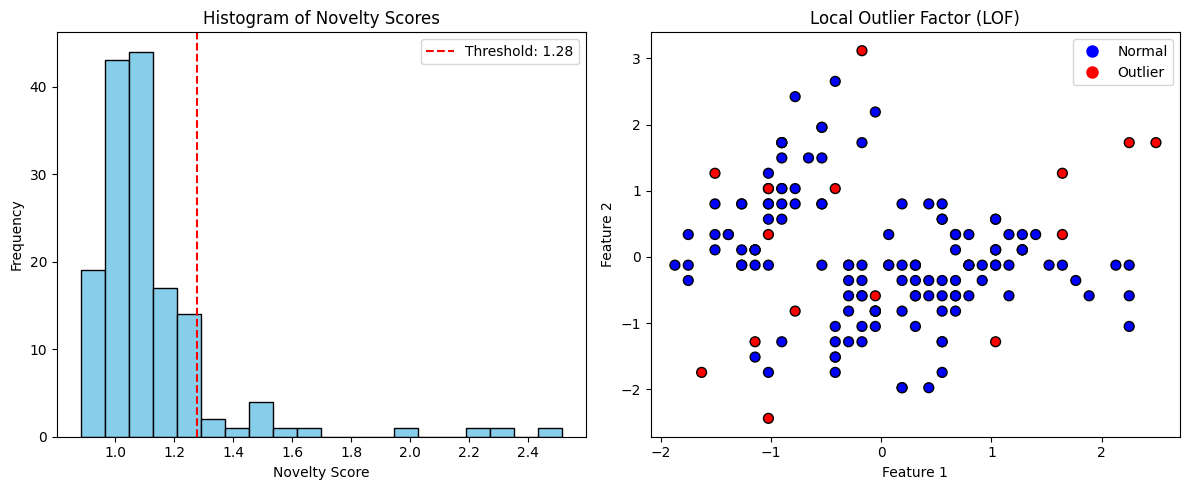

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def load():
    iris=pd.read_csv("iris.data",header=None)
    X=iris.iloc[:,:-1].values
    y=iris.iloc[:,-1].values
    scaler=StandardScaler()
    X_scaled=scaler.fit_transform(X)
    return X_scaled,iris

def lof(X_scaled,iris):
    lof=LocalOutlierFactor(n_neighbors=3,contamination=0.1)
    y_pred=lof.fit_predict(X_scaled)
    novelty_scores=-lof.negative_outlier_factor_
    threshold=np.percentile(novelty_scores, 90)
    predicted_labels=np.where(y_pred==-1,1,0)
    anomaly_indices=np.where(y_pred==-1)[0]
    print("indices de las anomalias")
    print(anomaly_indices)
    print("datos clasificados como anomalias")
    print(iris.iloc[anomaly_indices])
    return novelty_scores,threshold,predicted_labels,y_pred

def plot(X,novelty_scores,threshold,predicted_labels,y_pred):
    # Plot histogram of novelty scores
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(novelty_scores, bins=20, color='skyblue', edgecolor='black')
    plt.title("Histogram of Novelty Scores")
    plt.xlabel("Novelty Score")
    plt.ylabel("Frequency")
    plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.2f}')
    plt.legend()
    
    # Scatter plot of novelties overlaid on the original data
    plt.subplot(1, 2, 2)
    colors = np.array(['red', 'blue'])
    #shift the values to the right so [-1,1] converts to [0,2]
    plt.scatter(X[:, 0], X[:, 1], c=colors[(y_pred + 1) // 2], s=50, edgecolors='k')
    plt.title("Local Outlier Factor (LOF)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(['Normal', 'Outlier'], loc='best')
    
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Normal'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Outlier')
    ]
    plt.legend(handles=legend_elements, loc='best')
    
    plt.tight_layout()
    plt.show()

def main():
    X,iris=load()
    noveltyScores,threshold,predicted_labels,y_pred=lof(X,iris)
    plot(X,noveltyScores,threshold,predicted_labels,y_pred)

main()

    
    
    
    
    
    
    
    
    